## Uczenie liniowej hipotezy dla problemu przewidywania cen nieruchomości

### Wczytanie i prezentacja danych

In [2]:
import pandas as pd
import numpy as np

In [3]:
housing = pd.read_csv('housing_data.csv')

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Przekształcanie wartości w postaci stringów na wartości liczbowe

In [5]:
housing_prep = housing
housing_prep['mainroad'] = housing_prep['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
housing_prep['guestroom'] = housing_prep['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
housing_prep['basement'] = housing_prep['basement'].apply(lambda x: 1 if x == 'yes' else 0)
housing_prep['hotwaterheating'] = housing_prep['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
housing_prep['airconditioning'] = housing_prep['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
housing_prep['prefarea'] = housing_prep['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)
housing_prep['furnishingstatus'] = housing_prep['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [6]:
housing_prep.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


#### Rozdzielenie danych na cechy i target (ceny)

In [7]:
housing_data = housing_prep.iloc[:, 1:]
housing_target = housing_prep.iloc[:, 0]

In [8]:
housing_data.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2


In [9]:
housing_target.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

### Przekształcanie na tabele danych

In [10]:
data_np = np.array(housing_data, dtype=np.float64)
target_np = np.array(housing_target, dtype=np.float64)

print(type(data_np))
print(type(target_np))

print(data_np.shape)
print(target_np.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(545, 12)
(545,)


In [11]:
print("First house in dataset")
print(data_np[0,:])

First house in dataset
[7.42e+03 4.00e+00 2.00e+00 3.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00
 1.00e+00 2.00e+00 1.00e+00 2.00e+00]


In [12]:
print(target_np[0])

13300000.0


In [13]:
print("---Mean---")
print(data_np.mean(axis=0))
print("---std---")
print(data_np.std(axis=0))

---Mean---
[5.15054128e+03 2.96513761e+00 1.28623853e+00 1.80550459e+00
 8.58715596e-01 1.77981651e-01 3.50458716e-01 4.58715596e-02
 3.15596330e-01 6.93577982e-01 2.34862385e-01 9.30275229e-01]
---std---
[2.16814915e+03 7.37386427e-01 5.02008423e-01 8.66696233e-01
 3.48314687e-01 3.82497298e-01 4.77113618e-01 2.09206500e-01
 4.64752931e-01 8.60794942e-01 4.23912780e-01 7.60673843e-01]


### Wizualizacja danych

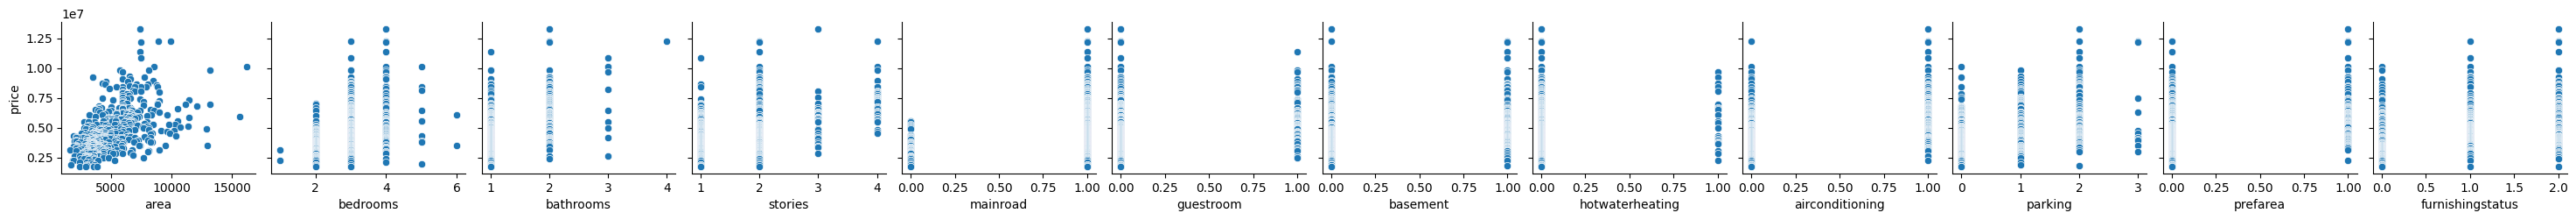

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.pairplot(data=pd.concat([housing_data, housing_target], axis=1), x_vars=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'], y_vars=['price'], diag_kind="kde")

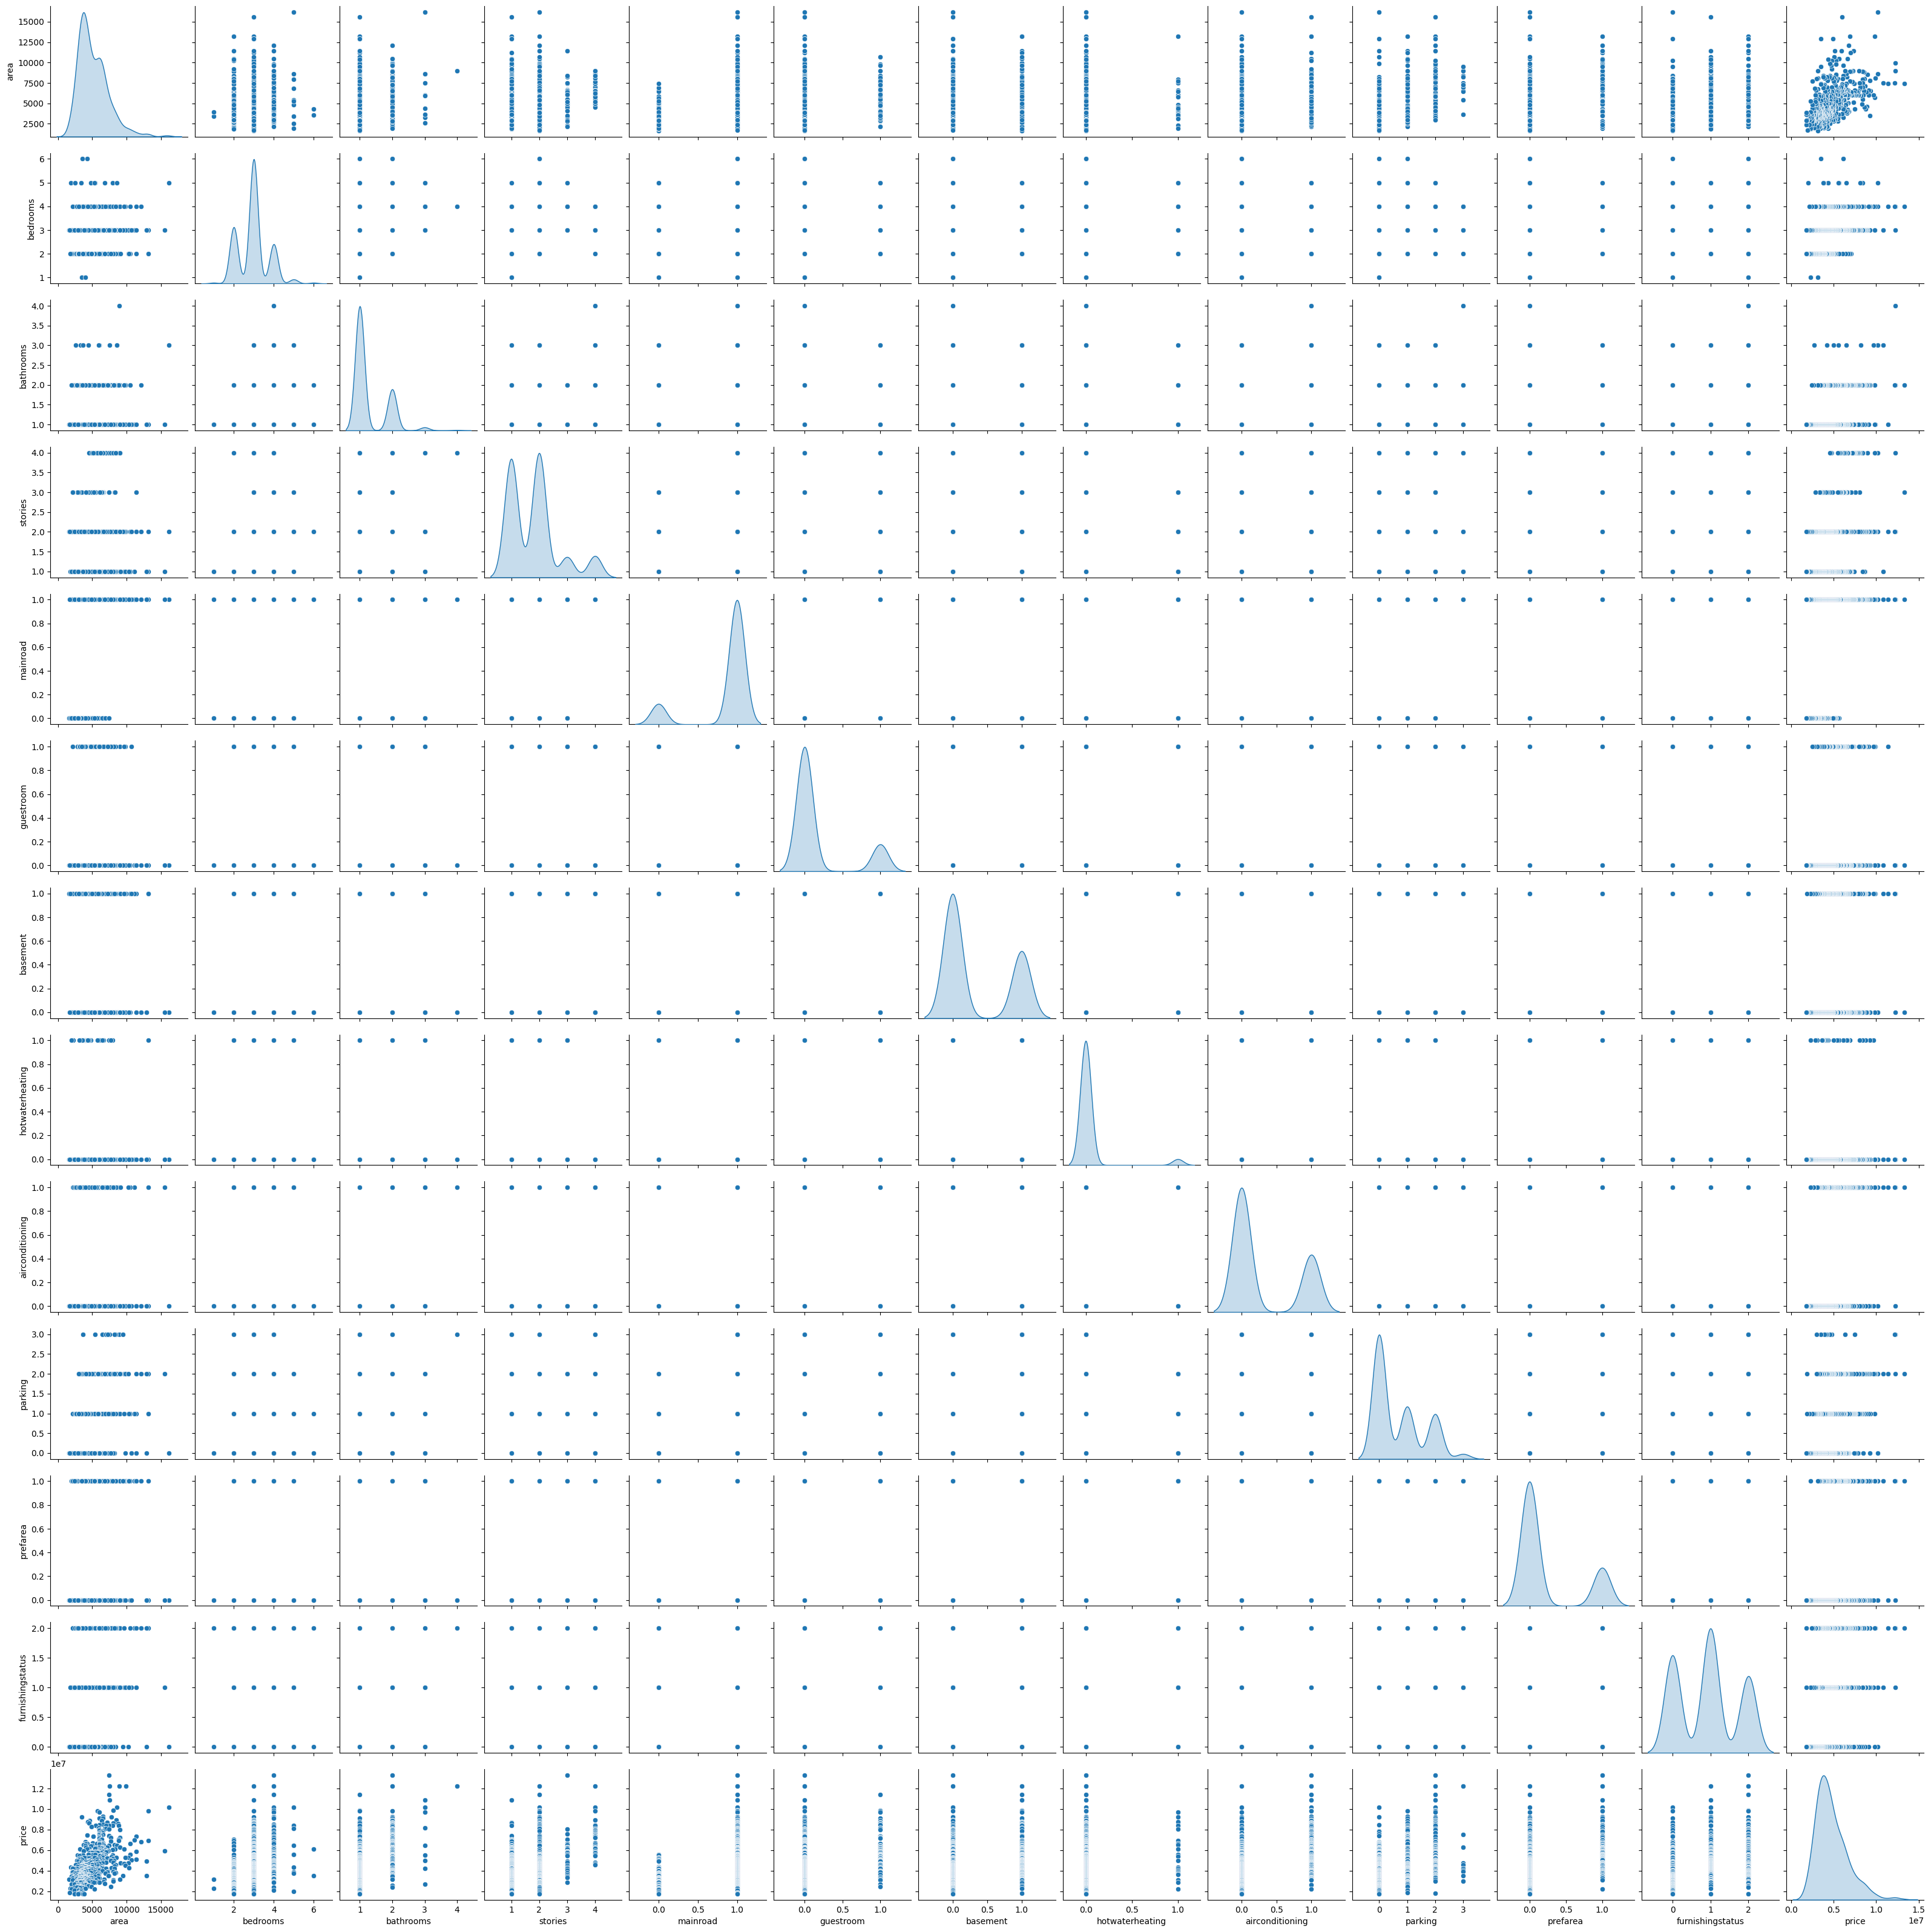

In [15]:
sns.pairplot(data=pd.concat([housing_data, housing_target], axis=1), diag_kind="kde")

### Skalowanie danych

In [316]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_np)

In [317]:
print("First house in database")
print(scaled_data[0,:])
print('---Mean---')
print(scaled_data.mean(axis=0))
print('--std---')
print(scaled_data.std(axis=0))

First house in database
[ 1.04672629  1.40341936  1.42181174  1.37821692  0.40562287 -0.46531479
 -0.73453933 -0.2192645   1.4726183   1.51769249  1.80494113  1.40628573]
---Mean---
[-1.56449777e-16 -1.82524739e-16 -2.60749628e-17 -1.30374814e-16
 -1.82524739e-16  5.21499256e-17 -7.82248883e-17 -6.51874070e-18
 -5.21499256e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00]
--std---
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Podział danych na zbiory testowe i treningowe

In [428]:
from sklearn.model_selection import train_test_split

housing_train_data, housing_test_data, \
housing_train_target, housing_test_target = \
train_test_split(scaled_data, target_np, test_size=0.2)

In [429]:
print("Training dataset:")
print("clients_train_data:", housing_train_data.shape)
print("clients_train_target:", housing_train_target.shape)

Training dataset:
clients_train_data: (436, 12)
clients_train_target: (436,)


In [430]:
print("Testing dataset:")
print("clients_test_data:", housing_test_data.shape)
print("clients_test_target:", housing_test_target.shape)

Testing dataset:
clients_test_data: (109, 12)
clients_test_target: (109,)


### Trenowanie modelu regresji liniowej

In [431]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(housing_train_data, housing_train_target)

LinearRegression()

### Ewaluacja modelu

In [432]:
from sklearn.metrics import mean_squared_error
print("Mean squared error of a learned model: %.2f" % 
      mean_squared_error(housing_test_target, linear_regression.predict(housing_test_data)))

Mean squared error of a learned model: 950035669130.58


In [433]:
accuracy = linear_regression.score(housing_test_data, housing_test_target)
print(f" Model accuracy: {accuracy}")

 Model accuracy: 0.7313710820846534


In [434]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(housing_test_target, linear_regression.predict(housing_test_data)))

Variance score: 0.73


### Predykcja

In [477]:
id=7
linear_regression_prediction = linear_regression.predict(housing_test_data[id,:].reshape(1,-1))

In [478]:
print("Model predicted for house {0} value {1}".format(id, linear_regression_prediction))

Model predicted for house 7 value [2845750.86336335]


In [479]:
print("Real value for house \"{0}\" is {1}".format(id, housing_test_target[id]))

Real value for house "7" is 2450000.0


#### Przewidziane ceny wszystkich nieruchomości

In [482]:
linear_regression_predictions = linear_regression.predict(housing_test_data)
print(linear_regression_predictions)

[4806709.23822768 5517572.64249049 5914796.59378356 2694925.78011112
 4760519.70875763 5743934.9882942  3984923.34245895 2845750.86336335
 4751932.23652685 6679674.19539928 2202114.13059581 4087001.34800246
 4000267.33747812 3216446.97701102 4995989.29960169 6457357.2150961
 5003195.41711231 4900435.78803489 7443308.69421435 3030051.35884735
 7168122.12979601 4036101.92445867 3904025.94344125 7401442.25929385
 2762876.02088063 7212227.83792965 4426229.3102371  4594002.26577981
 3995004.19255295 2996884.731316   4092932.18366779 3553970.45885259
 3214915.84932799 2779986.26818976 6309393.10484285 6600580.4342287
 4921832.33882409 2253060.82106659 6075928.00510608 5655231.37575937
 5746214.30542704 8391221.69245012 2659797.86828983 4452040.47399397
 7086527.26530106 4013864.81634961 3749649.43074301 6377913.41316137
 5076495.47412616 2427911.42266191 7831655.39501834 3269186.93008265
 6819748.46601759 5810949.57783145 4919166.71965417 5399780.00127473
 2228789.65848812 6504053.7212395  4

#### Prawdziwe ceny nieruchomości

In [ ]:
print(housing_test_target)